In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"train.csv")

In [3]:
df.head()

,emotion,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,Fear,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
1,Fear,55,55,55,55,55,54,60,68,54,...,90,83,77,53,37,34,30,34,30,57
2,Sad,20,17,19,21,25,38,42,42,46,...,29,36,68,91,85,93,97,99,107,118
3,Happy,4,2,13,41,56,62,67,87,95,...,59,66,80,74,69,99,28,3,7,12
4,Fear,255,255,255,255,255,255,255,255,255,...,94,21,22,51,71,80,82,79,79,83


In [4]:
df1=df.drop("emotion",axis=1)

In [5]:
df1.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
1,55,55,55,55,55,54,60,68,54,85,...,90,83,77,53,37,34,30,34,30,57
2,20,17,19,21,25,38,42,42,46,54,...,29,36,68,91,85,93,97,99,107,118
3,4,2,13,41,56,62,67,87,95,62,...,59,66,80,74,69,99,28,3,7,12
4,255,255,255,255,255,255,255,255,255,255,...,94,21,22,51,71,80,82,79,79,83


In [6]:
images1=np.array(df1)

In [7]:
images1.shape

(10817, 2304)

In [8]:
images1.size

24922368

In [9]:
pics=[]
for x in range(10817):
    pics.append(images1[x].reshape(48,48))
    

In [10]:
images1[2].shape

(2304,)

In [11]:
train=np.array(pics)
train

array([[[231, 212, 156, ...,  44,  27,  16],
        [229, 175, 148, ...,  27,  35,  27],
        [214, 156, 157, ...,  28,  22,  28],
        ...,
        [241, 245, 250, ...,  57, 101, 146],
        [246, 250, 252, ...,  78, 105, 162],
        [250, 251, 250, ...,  88, 110, 152]],

       [[ 55,  55,  55, ..., 116,  99,  74],
        [ 55,  55,  55, ..., 126, 115,  90],
        [ 55,  55,  55, ..., 128, 136, 114],
        ...,
        [ 56,  56,  56, ...,  30,  31,  39],
        [ 57,  57,  57, ...,  32,  31,  51],
        [ 57,  57,  57, ...,  34,  30,  57]],

       [[ 20,  17,  19, ..., 187, 176, 162],
        [ 22,  17,  17, ..., 195, 180, 171],
        [ 17,  17,  18, ..., 203, 193, 175],
        ...,
        [  1,   1,   1, ..., 106, 115, 119],
        [  2,   2,   1, ..., 103, 111, 119],
        [  2,   2,   2, ...,  99, 107, 118]],

       ...,

       [[ 84,  85,  85, ...,  86,  86,  87],
        [ 85,  85,  85, ...,  86,  87,  87],
        [ 85,  85,  86, ...,  86,  87,  87

In [12]:
sii=pics[3]

In [13]:
sii.shape

(48, 48)

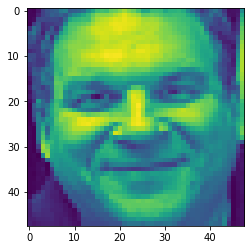

In [14]:
plt.imshow(pics[3])

In [15]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D

In [16]:
img_rows,img_cols=48,48
num_classes=3

In [17]:
model = Sequential()

# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

In [18]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
label=np.array(df["emotion"])
label=label.reshape(-1,1)
label=enc.fit_transform(label)

In [19]:
train=train.reshape(10817,48,48,1)


from keras.optimizers import RMSprop,SGD,Adam
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])




history = model.fit(train, label, epochs=10)

Epoch 1/10


TypeError: in user code:

    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:250 call  **
        y_pred, y_true = tf_losses_util.squeeze_or_expand_dimensions(
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\ops\losses\util.py:71 squeeze_or_expand_dimensions
        y_true, y_pred = confusion_matrix.remove_squeezable_dimensions(
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\ops\confusion_matrix.py:63 remove_squeezable_dimensions
        labels = ops.convert_to_tensor(labels)
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1499 convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\framework\constant_op.py:338 _constant_tensor_conversion_function
        return constant(v, dtype=dtype, name=name)
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\framework\constant_op.py:263 constant
        return _constant_impl(value, dtype, shape, name, verify_shape=False,
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\framework\constant_op.py:280 _constant_impl
        tensor_util.make_tensor_proto(
    C:\Users\silvo\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:550 make_tensor_proto
        raise TypeError("Failed to convert object of type %s to Tensor. "

    TypeError: Failed to convert object of type <class 'tensorflow.python.framework.sparse_tensor.SparseTensor'> to Tensor. Contents: SparseTensor(indices=Tensor("DeserializeSparse:0", shape=(None, 2), dtype=int64), values=Tensor("DeserializeSparse:1", shape=(None,), dtype=float32), dense_shape=Tensor("stack:0", shape=(2,), dtype=int64)). Consider casting elements to a supported type.
